# Capstone Project on Barcelona Deta Set
##### By Kosha Patel

### Introduction

Barcelona is the capital City of Spain. With a population of 1.6 million within city limits, its urban area extends to numerous neighbouring municipalities within the Province of Barcelona and is home to around 4.8 million people, making it the sixth most populous urban area in the European Union.  

In this Capstone, I have perform exploratory data analysis on Population and Transportation using different data files. The Data Set has been taken from [Kaggle](https://www.kaggle.com/xvivancos/barcelona-data-sets). 

### Data

* Population Data Set
    * 70080 Records
    * 8 Columns
* Births Data Set
    * 734 Records
    * 7 Columns
* Deaths Data Set
    * 4599 Records
    * 7 Columns
* Immigrans and Emigrant Data Set
    * 4662 Records
    * 8 Columns
* Transports Data Set
    * 651 Records
    * 7 Columns

In [3]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import folium
from matplotlib.lines import Line2D
%matplotlib inline

### Context

* Population in Barcelona has been increased over time. 
* Total Population in Barcelona was 1.62 million in 2017 when women outnumbered men by 5%.

In [4]:
# Import Population Data set
population = pd.read_csv('../Data/population.csv')
population.head(5)

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [5]:
# Change column names by replacing '.' with '_'
population.rename(columns={'District.Name':'District_Name','District.Code':'District_Code',
                            'Neighborhood.Code':'Neighborhood_Code','Neighborhood.Name':'Neighborhood_Name'},inplace=True)
#population.info()
total_pop_num = population.loc[population['Year'] == 2017]['Number'].sum()
print("Population in 2017: {}".format(total_pop_num))

Population in 2017: 1620809


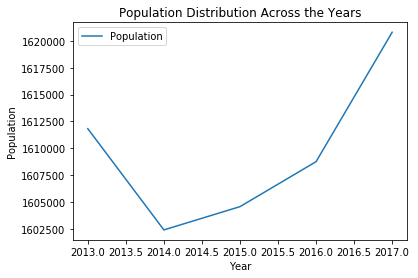

In [6]:
y =population.groupby(['Year'])['Number'].sum()
#plt.figure(figsize=(15,10))
plt.plot(y)
plt.ylabel('Population')
plt.xlabel('Year')
plt.legend(['Population'])
plt.title('Population Distribution Across the Years')
plt.show()

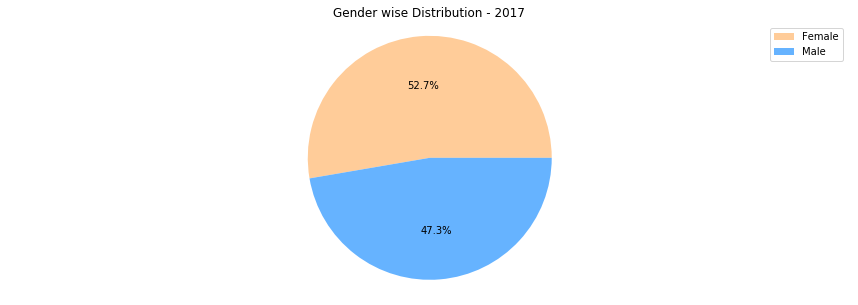

In [7]:
female = population.loc[population['Gender'] == 'Female']['Number'].sum()
male = population.loc[population['Gender'] == 'Male']['Number'].sum()
colors = ['#ffcc99','#66b3ff']
gender_df = population.loc[population['Year'] == 2017].groupby(['Gender'])['Number'].sum()
plt.figure(figsize=(15, 5))
plt.pie(gender_df, autopct='%.1f%%', colors=colors)
plt.axis('equal')
plt.title('Gender wise Distribution - 2017')
plt.legend(gender_df.index)
plt.show()

### Data Analysis
#### Question 1:
#### Which one is most populated district in Barcelona? 
* With population over 250,000, Eixample is the most populated District among all

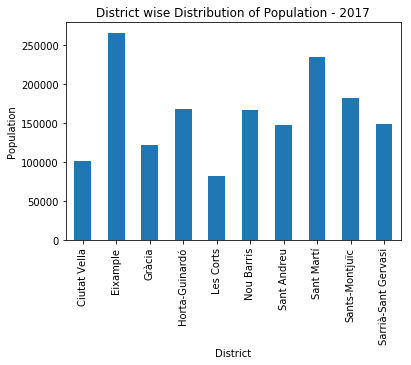

In [8]:
#plt.figure(figsize=(15,10))
population.loc[population['Year'] == 2017].groupby(['District_Name'])['Number'].sum().plot(kind='bar')
plt.ylabel('Population')
plt.xlabel('District')
plt.title('District wise Distribution of Population - 2017')
plt.show()

#### Question 2:
#### How Birth and Death affected population in 2017? 
* Gender wise Distribution of Birth shows that more Boys are being born than  girls.
* More people are dying than being born. 

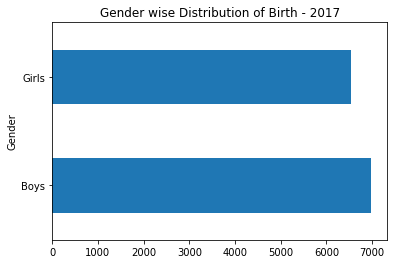

In [9]:
#Import Births data set
birth = pd.read_csv('../Data/births.csv')

#Remane column name
birth.rename(columns={'District Name':'District_Name','District Code':'District_Code',
                        'Neighborhood Code':'Neighborhood_Code','Neighborhood Name':'Neighborhood_Name'},inplace=True)

birth.head()
#plt.figure(figsize=(15,10))
new_born = birth[birth['Year'] == 2017].groupby(['Gender'])['Number'].sum().\
            sort_values(axis=0, ascending=False)[:25].plot(kind='barh')
plt.title('Gender wise Distribution of Birth - 2017')
plt.show()

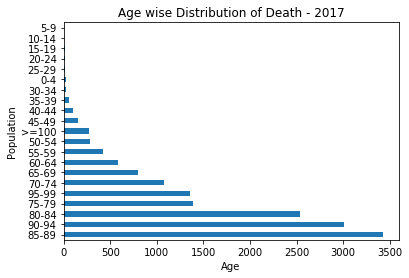

In [10]:
#Import Deaths data set
death = pd.read_csv('../Data/deaths.csv')

#Rename Column name
death.rename(columns={'District.Name':'District_Name','District.Code':'District_Code',
                      'Neighborhood Code':'Neighborhood_Code','Neighborhood Name':'Neighborhood_Name'},inplace=True)
death.head(5)
#plt.figure(figsize=(15,10))
death_num = death.loc[death['Year'] == 2017].groupby(['Age'])['Number'].sum().sort_values(axis=0, ascending=False)[:25].\
                    plot(kind='barh')
plt.ylabel('Population')
plt.xlabel('Age')
plt.title('Age wise Distribution of Death - 2017')
plt.show()

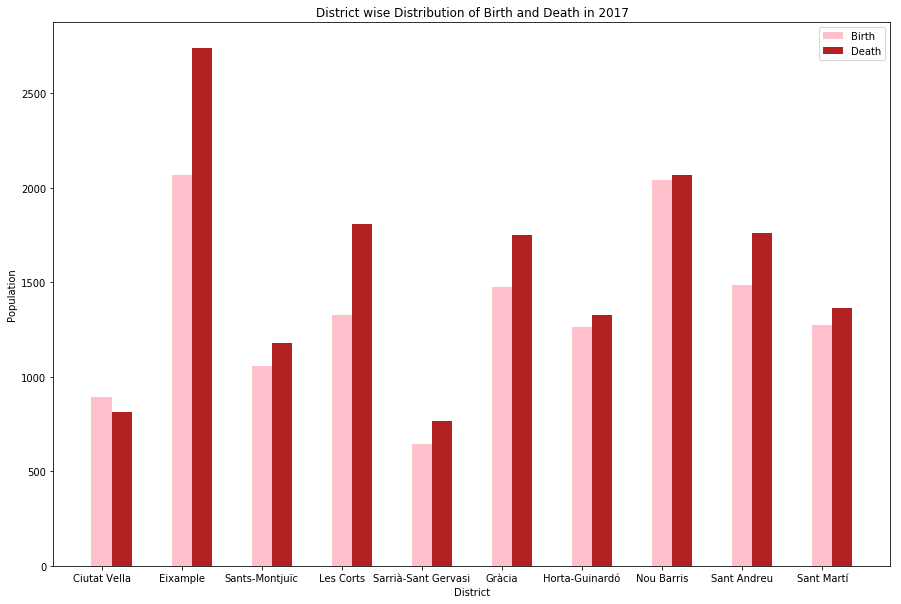

In [11]:
# Plot Bar chart
plt.figure(figsize=(15,10))
birth_num = birth.loc[birth['Year'] == 2017].groupby(['District_Name'])['Number'].sum()
death_num = death.loc[death['Year'] == 2017].groupby(['District_Name'])['Number'].sum()
Distrit_Name = list(death['District_Name'].unique())

data = [birth_num,death_num]
X = np.arange(10)
plt.bar(X + 0.00, data[0], color = 'pink', width = 0.25, label = 'Birth')
plt.bar(X + 0.25, data[1], color = 'firebrick', width = 0.25, label = 'Death')

# Set label and title
plt.legend(['Birth','Death'])
plt.xticks(X, Distrit_Name)
plt.ylabel('Population')
plt.xlabel('District')
plt.title('District wise Distribution of Birth and Death in 2017')
plt.show()

#### Question 3:
#### As seen in Population Distribution over years, Population is increased over time. Also, fewer Births than Deaths among majority of Districts is clearly visible in above 'District wise Distribution of Birth and Death in 2017'. What is the reason behind increased Population? 
* Population is incresing as more number of Immigrants are moving to Barcelona. Men to Women population ration is also affeted by this. 
* On Average 90,493 Immigrants migrat to Barcelona and 52,345 people leaves Barcelona every year. People over 70 moves out to Barcelona more often. So on average population is getting increased every year by 2.5%
* In 2017, around 165,051 International immigrants and 106,430 migrants from Spain were welcomed in Barcelona. 

In [12]:
#Import Immigrants by Nationality Data set
immigrants = pd.read_csv('../Data/immigrants_by_nationality.csv')
immigrants.rename(columns={'District Name':'District_Name','District Code':'District_Code'},inplace=True)
immigrants.rename(columns={'Neighborhood Code':'Neighborhood_Code','Neighborhood Name':'Neighborhood_Name'},inplace=True)
#immigrants.head()

In [13]:
filtered_data = immigrants[immigrants['Nationality']!='Spain']
init_notebook_mode(connected=True)
cf.go_offline()
data = dict (
    type = 'choropleth',
    locations = filtered_data['Nationality'].unique(),
    locationmode='country names',
    colorscale = 'Viridis',
    z=filtered_data.set_index(['Nationality'])['Number'].sum(level='Nationality'))

layout = dict(title='Number of Immigrants to Barcelona : 2015 -2017')

map = go.Figure(data=[data],layout=layout)
iplot(map)

In [16]:
total_Immigrants=filtered_data.set_index(['Nationality'])['Number'].sum()
spain_immigrants = immigrants.set_index(['Nationality'])['Number'].sum()
print('Total number of International Immigrants : {}'.format(total_Immigrants))
print('Total number of Immigrants including Spain: {}'.format(spain_immigrants))

Total number of International Immigrants : 165051
Total number of Immigrants including Spain: 271481


In [17]:
#Import Immigrants by age Data set
migrants = pd.read_csv('../Data/immigrants_emigrants_by_age.csv')
migrants.rename(columns={'District Name':'District_Name','District Code':'District_Code'},inplace=True)
migrants.rename(columns={'Neighborhood Code':'Neighborhood_Code','Neighborhood Name':'Neighborhood_Name'},inplace=True)
#migrants.head()

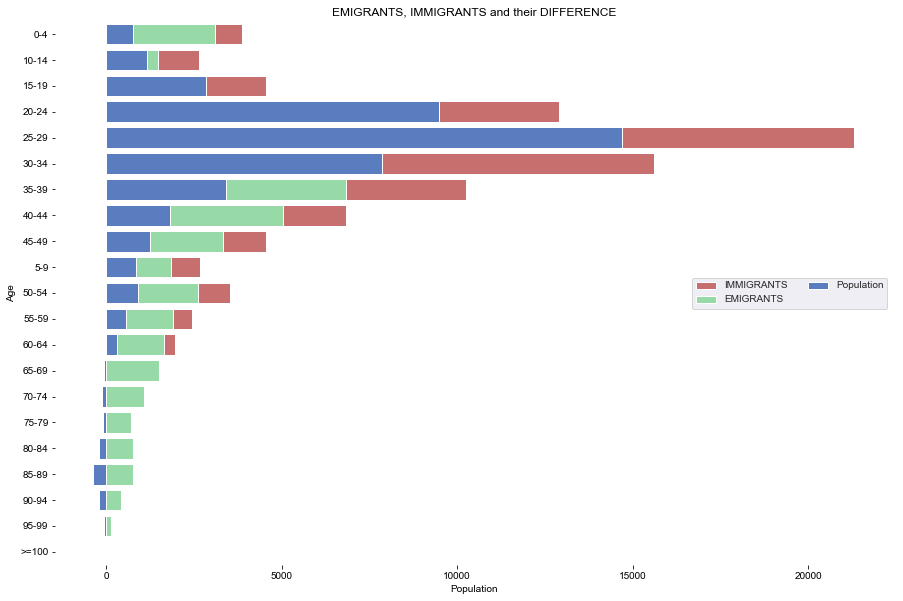

In [18]:
age_df = migrants[migrants['Year']==2017].groupby('Age').sum()
age_df = age_df.drop(columns = ['Neighborhood_Code', 'District_Code', 'Year'], axis=1)
age_df['DIFF'] = age_df["Immigrants"] - age_df["Emigrants"]
age_df['Death_Number'] = death[death['Year']==2017].groupby('Age').sum().drop(columns = ['Neighborhood.Code', 
                                                                                         'District_Code','Year'], axis=1)
age_df = age_df.reset_index()
#age_df
f, ax = plt.subplots(figsize=(15,10))

plt.title('EMIGRANTS, IMMIGRANTS and their DIFFERENCE')
sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Immigrants", y="Age", data=age_df,label="IMMIGRANTS",color='r')

sns.set_color_codes("pastel")
sns.set_style(style='darkgrid')
sns.barplot(x="Emigrants", y="Age", data=age_df,label="EMIGRANTS",color='g')

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="DIFF", y="Age", data=age_df,label="Population",color='b')

#sns.set_color_codes("pastel")
#sns.set_style(style='darkgrid')
#sns.barplot(x="Death_Number", y="Age", data=age_df,label="Population",color='y')
#plt.legend(['IMMIGRANTS','EMIGRANTS','DIFF','Death'])
ax.legend(ncol=2, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
plt.ylabel('Age')
plt.xlabel('Population')
plt.show()

In [19]:
by_year_df = migrants.groupby(['Year']).sum()
by_year_df = by_year_df.drop(columns = ['Neighborhood_Code', 'District_Code'], axis=1)
by_year_df['DIFF'] = by_year_df["Immigrants"] - by_year_df["Emigrants"]
total_population = population.groupby(['Year']).sum()
total_population
by_year_df['Total_Population'] = total_population["Number"]
by_year_df.describe()
by_year_df['Growth'] = by_year_df['DIFF'] * 100 / by_year_df['Total_Population']
by_year_df["Death"] = death.groupby('Year').sum().drop(columns = ['Neighborhood.Code','District_Code'], axis=1)
by_year_df['Loss'] = by_year_df['Death'] * 100 / by_year_df['Total_Population']
print("2015 - 2017 Average % Loss : {}%".format(by_year_df['Loss'].mean()))
by_year_df["Birth"] = birth.groupby('Year').sum().drop(columns = ['Neighborhood_Code','District_Code'], axis=1)
by_year_df['Percent_Birth'] = by_year_df['Birth'] * 100 / by_year_df['Total_Population']
print("2015 - 2017 Average % Birth : {}%".format(by_year_df['Percent_Birth'].mean()))
print("2015 - 2017 Average % Migrants Growth : {}%".format(by_year_df['Growth'].mean()))
print("2015 - 2017 Average population growth : {}".format(by_year_df['DIFF'].mean()))
print("2015 - 2017 Average Immigrants : {}".format(by_year_df['Immigrants'].mean()))
print("2015 - 2017 Average Emigrants : {}".format(by_year_df['Emigrants'].mean()))
by_year_df

2015 - 2017 Average % Loss : 0.9562228652013949%
2015 - 2017 Average % Birth : 0.8412477579026456%
2015 - 2017 Average % Migrants Growth : 2.36632733217511%
2015 - 2017 Average population growth : 38148.666666666664
2015 - 2017 Average Immigrants : 90493.66666666667
2015 - 2017 Average Emigrants : 52345.0


,Immigrants,Emigrants,DIFF,Total_Population,Growth,Death,Loss,Birth,Percent_Birth
Year,,,,,,,,,
2015,88982,54109,34873,1604555,2.173375,15478,0.964629,13510,0.841978
2016,85172,50274,34898,1608746,2.169267,15183,0.943779,13630,0.847244
2017,97327,52652,44675,1620809,2.756340,15564,0.960261,13526,0.834522


#### Question 4: 
#### What will be the Population in 2018 in Barcelona? How many people will die in 2018? How birth and migrants will affect Population?
* Considering past 3 years average, Population growth can be expected in 2018
    * Around 16,370 death can be predicted.
    * 14,425 new borns are expected.
    * About 90,493 Immigrants moved to Barcelona and 52,345 left, population will grow about 40,520. 
    * Overall, Populaton in Bracelona will be 1.66 Million in 2018

In [20]:
# death perdiction = 2017 population * average % death / 100
death_18 = 1620809 * 1.01 / 100
#death_18 
birth_18 = 1620809 * 0.89 / 100
migrant_population = 1620809 * 2.5 / 100
migrant_population
population_18 = 1620809 - death_18 + birth_18 + migrant_population

print("Death Prediction - 2018: {}".format(round(death_18)))
print("Birth Prediction - 2018: {}".format(round(birth_18)))
# Diff 2018
print("Immigrants and Emigrants Difference Prediction - 2018: {}".format(round(migrant_population)))
# Total_Population 2018
print("Predicted Total Population - 2018: {}".format(round(population_18)))

Death Prediction - 2018: 16370
Birth Prediction - 2018: 14425
Immigrants and Emigrants Difference Prediction - 2018: 40520
Predicted Total Population - 2018: 1659384


#### Question 5 :
#### Which is the most convenient Transportation mode out of all available in Barcelona?
* Other than Bus, 8 types of public transportation are available. 
* Underground will be the most convenient transportation with 463 stations available in all districts.

In [21]:
transport = pd.read_csv('../Data/transports.csv')
transport_type = list(transport['Transport'].unique())
t = transport['Transport'].value_counts()
print(t)

Underground         463
Tram                 65
Railway (FGC)        54
RENFE                33
Maritime station     16
Airport train         9
Funicular             6
Cableway              5
Name: Transport, dtype: int64


In [22]:
#underground = transport.loc[transport['Transport'] == 'Underground']
#underground_loc = underground[['Latitude','Longitude','Station']]
barcelona_co = [41.3851, 2.1734]
color_list = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

#transports = transport.loc[transport['Transport'] == 'Underground']
#transport_loc = transport[['Latitude','Longitude','Station']]
transport_type = list(transport['Transport'].unique())
map_transport = folium.Map(location = barcelona_co, tiles = 'OpenStreetMap', zoom_start = 12)

for i, value in enumerate(transport_type) :
    tram = transport.loc[transport['Transport'] == value]
    tram_loc = tram[['Latitude','Longitude','Station']]
    color1 = color_list[i]
    for j in tram.iterrows():
        folium.CircleMarker([j[1]['Latitude'],j[1]['Longitude']],
                            radius=4,
                            color = color1,
                            popup=j[1]['Transport'],
                            fill=True).add_to(map_transport) 

map_transport

## Conclusion and Further Research
This project is an attempt to utilize available data to provide insight into Barcelona Population and Transportation. Young people all around the world like to migrate to Barcelona considering it the smartest city of Spain. On the other hand, old people like to move out in need of peace. Future population can be predicted considering  how Birth, Death and Migrants have affected population over past years. Huge number of public transportations are also available to provide basic mobility service.  

Further Research
To complete the comprehensive analysis of Barcelona, analysis of accidents, unmployement and air quality dataset is required. 
In this capston, 2018 population is predicted from past 3 years of data only. A detailed study of data over past 'n' years or more will help to forecast more accurate future population. For this I would like to study Time Series analysis allowing past information to generate projection on how Barcelona will change with time. This will allow to answer below questions:
* What is and will be most common Male/Female name?
* What will be population of Barcelona in 2020/2030/2050?
* Which month of year most accidents occur? Can public transportation help to decrease it?
* How air quality affect birth and Death?